# 🚀 Rocket

## 📥 라이브러리 준비

> 적절한 커널을 선택한 뒤에 실행하세요. 

In [1]:
! python -m pip install -U pip
! pip install pandas scikit-learn matplotlib seaborn imblearn

## 📦 데이터 준비

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Thanks to **dhaitz**!
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

# rocket = pd.read_csv('https://raw.githubusercontent.com/JayoungKim-ai/ML_dataset/refs/heads/main/RocketLaunchDataCSV.csv')
rocket = pd.read_csv('data/RocketLaunchDataCSV.csv')
rocket.head(3)

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,NaN,04-Dec-58,NaN,Cape Canaveral,NaN,NaN,75.0,68.0,71.00,NaN,...,16.0,15.0,NaN,NaN,NaN,30.22,NaN,10:26,Cloudy,NaN
1,NaN,05-Dec-58,NaN,Cape Canaveral,NaN,NaN,78.0,70.0,73.39,NaN,...,14.0,10.0,NaN,NaN,NaN,30.2,NaN,10:26,Cloudy,NaN
2,Pioneer 3,06-Dec-58,1:45,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,NaN,NaN,30.25,NaN,10:25,Cloudy,NaN


### 🔍 데이터 탐색

In [3]:
rocket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          60 non-null     object 
 1   Date                          300 non-null    object 
 2   Time (East Coast)             59 non-null     object 
 3   Location                      300 non-null    object 
 4   Crewed or Uncrewed            60 non-null     object 
 5   Launched?                     60 non-null     object 
 6   High Temp                     299 non-null    float64
 7   Low Temp                      299 non-null    float64
 8   Ave Temp                      299 non-null    float64
 9   Temp at Launch Time           59 non-null     float64
 10  Hist High Temp                299 non-null    float64
 11  Hist Low Temp                 299 non-null    float64
 12  Hist Ave Temp                 299 non-null    float64
 13  Perci

#### ✒️ 자료형 변환

In [4]:
# df['Sea Level Pressure'].astype('float') 
# 변환할 수 없는 값은 null처리
rocket['Sea Level Pressure'] = pd.to_numeric(rocket['Sea Level Pressure'], errors='coerce')
rocket['Sea Level Pressure'].head(3)

0    30.22
1    30.20
2    30.25
Name: Sea Level Pressure, dtype: float64

In [5]:
def time_to_decimal(time_str):
    try:
        # 시간과 분을 분리
        hours, minutes = map(int, time_str.split(':'))
        # 24시간 기준으로 소수점 변환 (시간 + 분/60)
        return hours + minutes/60
    except:
        return None

# 컬럼에 적용
rocket['Day Length'] = rocket['Day Length'].apply(time_to_decimal)

# 확인
print("변환된 값 샘플:", rocket['Day Length'].head())
print("데이터 타입:", rocket['Day Length'].dtype)

변환된 값 샘플: 0    10.433333
1    10.433333
2    10.416667
3    10.416667
4    12.400000
Name: Day Length, dtype: float64
데이터 타입: float64


#### 🔍 object 타입 데이터

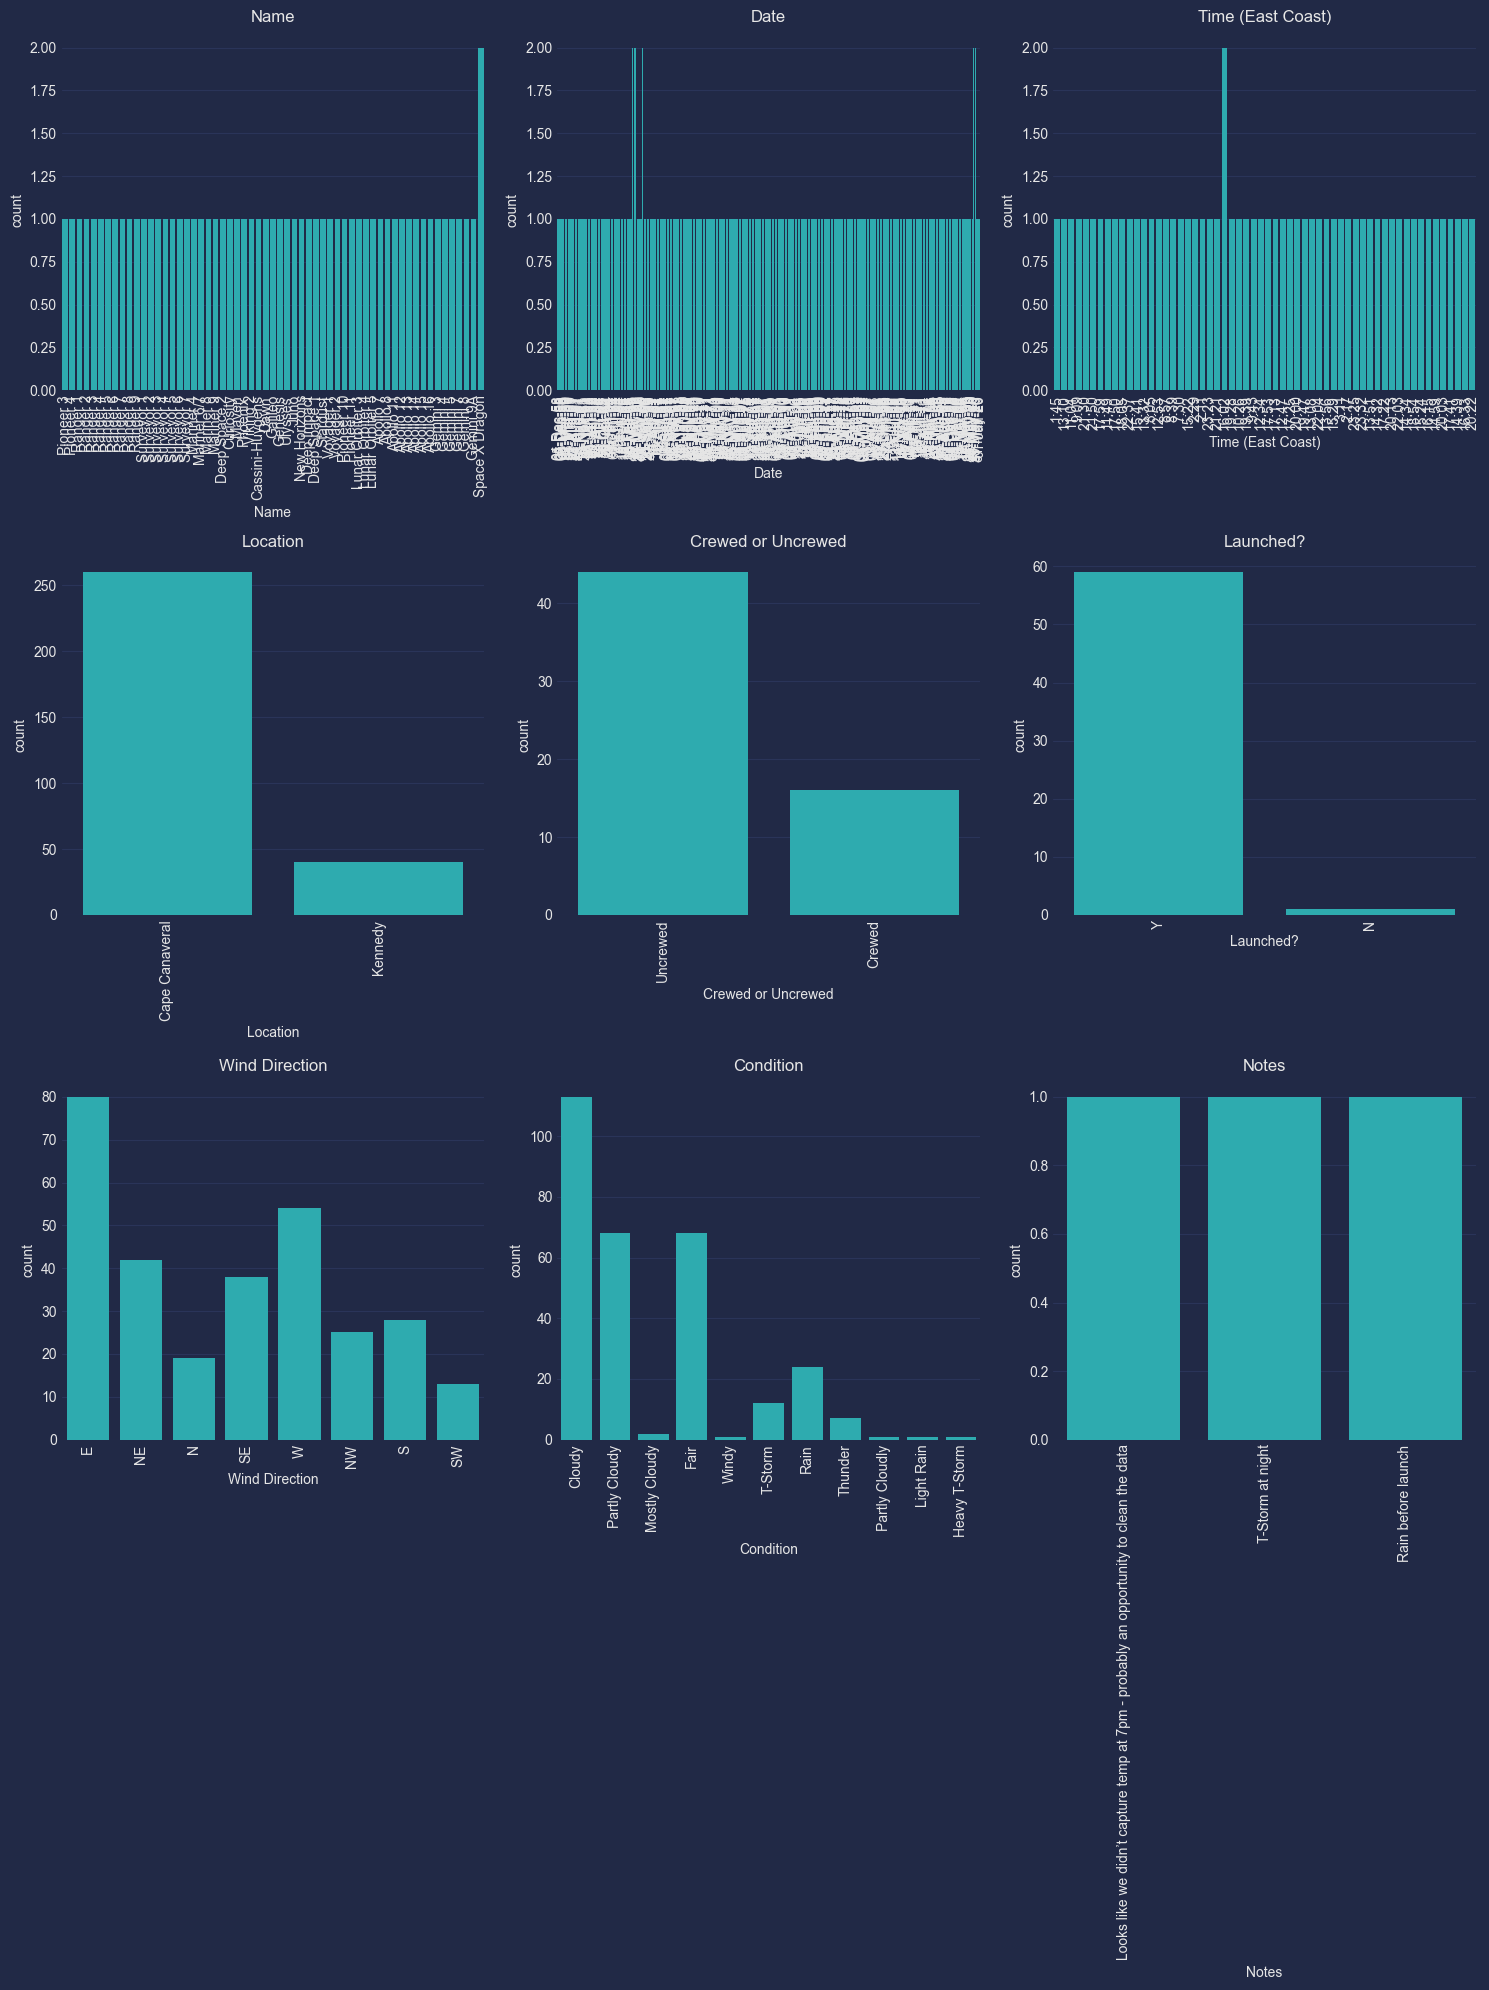

In [6]:
# 데이터타입이 object인 컬럼 추출출
object_cols = rocket.select_dtypes(include=['object']).columns
object_cols

# 데이터 분포 확인
plt.figure(figsize=(15,20))
i = 1
for col in object_cols:
    plt.subplot(3,3,i)
    i+=1
    sns.countplot(data=rocket, x=col)
    plt.xticks(rotation=90)
    plt.title(col)
plt.tight_layout()

#### 🔍 float 타입 데이터

Index(['High Temp', 'Low Temp', 'Ave Temp', 'Temp at Launch Time',
       'Hist High Temp', 'Hist Low Temp', 'Hist Ave Temp',
       'Percipitation at Launch Time', 'Hist Ave Percipitation',
       'Max Wind Speed', 'Visibility', 'Wind Speed at Launch Time',
       'Hist Ave Max Wind Speed', 'Hist Ave Visibility', 'Sea Level Pressure',
       'Hist Ave Sea Level Pressure', 'Day Length'],
      dtype='object')

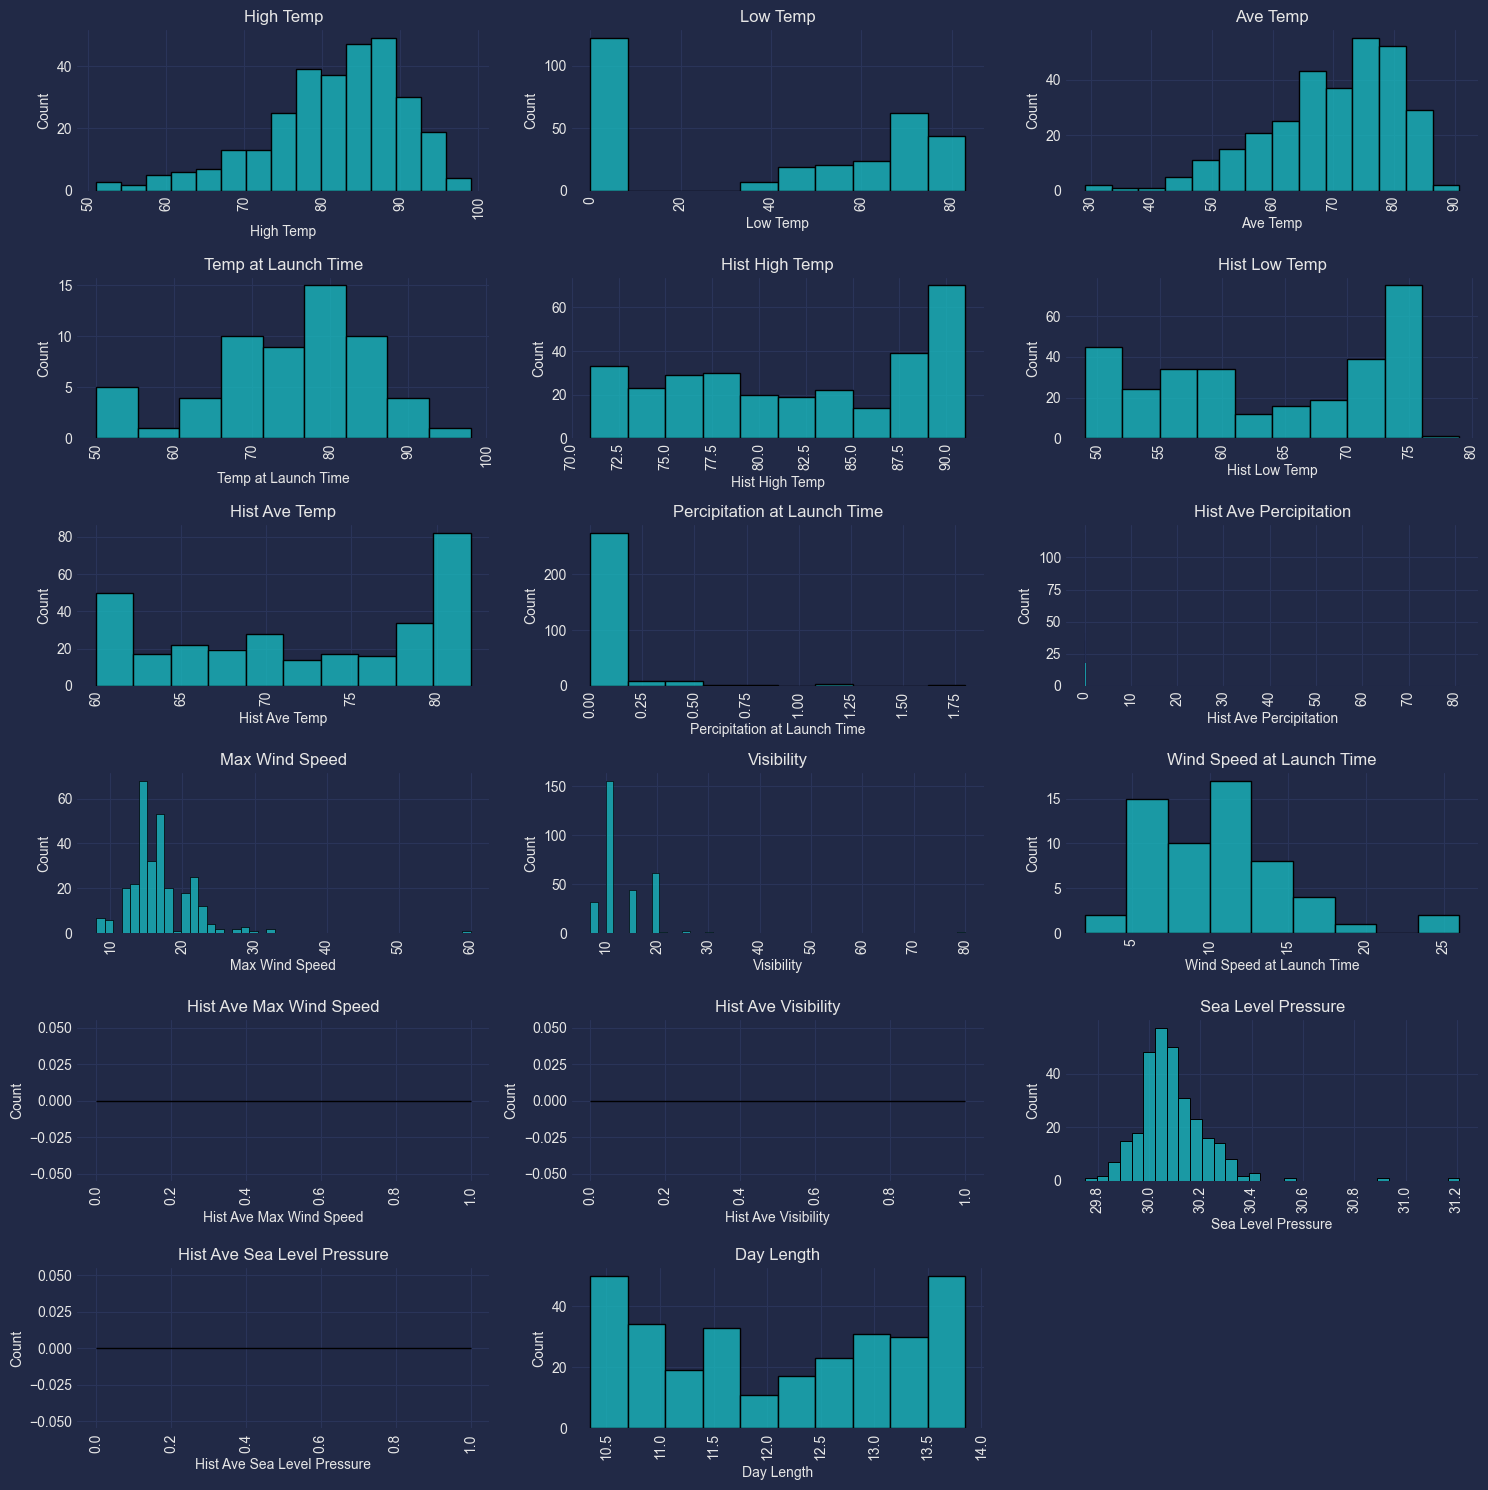

In [7]:
# 데이터타입이 float인 컬럼 추출
numeric_cols = rocket.select_dtypes(include=['int','float']).columns
display(numeric_cols)

# 데이터 분포 확인
plt.figure(figsize=(15,15))
i = 1
for col in numeric_cols:
    plt.subplot(6,3,i)
    i+=1
    sns.histplot(data=rocket, x=col)
    plt.xticks(rotation=90)
    plt.title(col)
plt.tight_layout()

## ✒️ 데이터 전처리

### 🗑️ 불필요한 컬럼 제거

In [8]:
# 사용하지 않을 컬럼
del_cols = ['Name', 'Date', 'Time (East Coast)','Notes',\
            'Percipitation at Launch Time', 'Hist Ave Percipitation',\
            'Hist Ave Max Wind Speed', 'Hist Ave Visibility','Hist Ave Sea Level Pressure']
df = rocket.drop(columns = del_cols)
df.head()

,Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Sea Level Pressure,Day Length,Condition
0,Cape Canaveral,NaN,NaN,75.0,68.0,71.00,NaN,75.0,55.0,65.0,E,16.0,15.0,NaN,30.22,10.433333,Cloudy
1,Cape Canaveral,NaN,NaN,78.0,70.0,73.39,NaN,75.0,55.0,65.0,E,14.0,10.0,NaN,30.20,10.433333,Cloudy
2,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,75.0,55.0,65.0,NE,15.0,10.0,11.0,30.25,10.416667,Cloudy
3,Cape Canaveral,NaN,NaN,76.0,57.0,66.04,NaN,75.0,55.0,65.0,N,10.0,10.0,NaN,30.28,10.416667,Partly Cloudy
4,Cape Canaveral,NaN,NaN,79.0,60.0,70.52,NaN,75.0,55.0,65.0,E,12.0,10.0,NaN,30.23,12.400000,Partly Cloudy


### ✒️ 결측치 확인 및 처리

In [9]:
# Crewed or Uncrewed --> 'Uncrewed'로 채우기
df['Crewed or Uncrewed'] = df['Crewed or Uncrewed'].fillna('Uncrewed')

# Launched? --> 'N'으로 채우기
df['Launched?'] = df['Launched?'].fillna('N')

In [10]:
# object타입 변수의 결측값 채우기 (최빈값으로 채우기)
obj_cols = df.select_dtypes(include=['object']).columns
df[obj_cols] = df[obj_cols].fillna(df[obj_cols].mode().iloc[0])
display(obj_cols)

Index(['Location', 'Crewed or Uncrewed', 'Launched?', 'Wind Direction',
       'Condition'],
      dtype='object')

In [11]:
# 수치형 타입 변수의 결측값 채우기 (평균값으로 채우기)
numeric_cols = df.select_dtypes(include=['int', 'float']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
display(numeric_cols)

Index(['High Temp', 'Low Temp', 'Ave Temp', 'Temp at Launch Time',
       'Hist High Temp', 'Hist Low Temp', 'Hist Ave Temp', 'Max Wind Speed',
       'Visibility', 'Wind Speed at Launch Time', 'Sea Level Pressure',
       'Day Length'],
      dtype='object')

In [12]:
df.head(3)

,Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Sea Level Pressure,Day Length,Condition
0,Cape Canaveral,Uncrewed,N,75.0,68.0,71.00,75.101695,75.0,55.0,65.0,E,16.0,15.0,10.59322,30.22,10.433333,Cloudy
1,Cape Canaveral,Uncrewed,N,78.0,70.0,73.39,75.101695,75.0,55.0,65.0,E,14.0,10.0,10.59322,30.20,10.433333,Cloudy
2,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.000000,75.0,55.0,65.0,NE,15.0,10.0,11.00000,30.25,10.416667,Cloudy


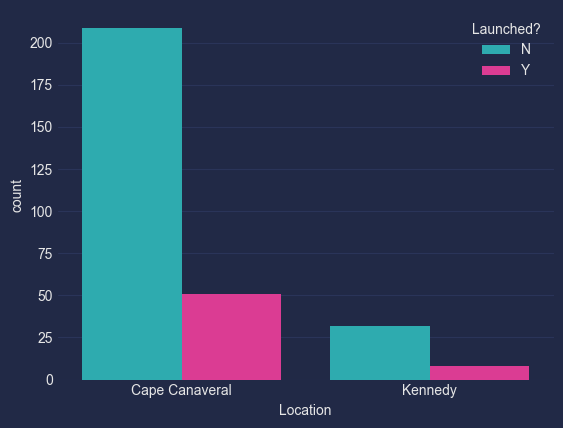

In [13]:
sns.countplot(data=df, x='Location', hue='Launched?')
plt.show()

## 🎛️ 독립변수와 종속변수

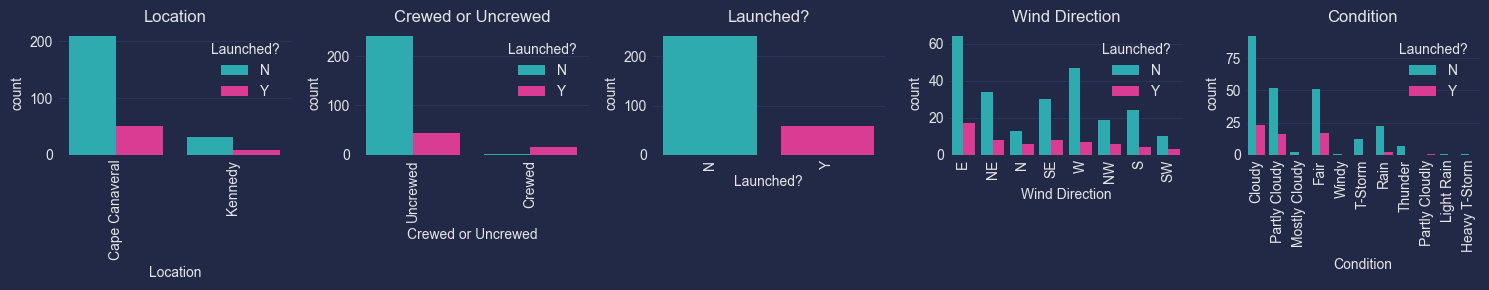

In [125]:
# 범주형 변수

plt.figure(figsize=(15, 3))

for i, col in enumerate(obj_cols, 1):
    plt.subplot(1, 5, i)
    sns.countplot(data=df, x=col, hue='Launched?')
    plt.xticks(rotation=90)
    plt.title(col)
plt.tight_layout()
plt.show()

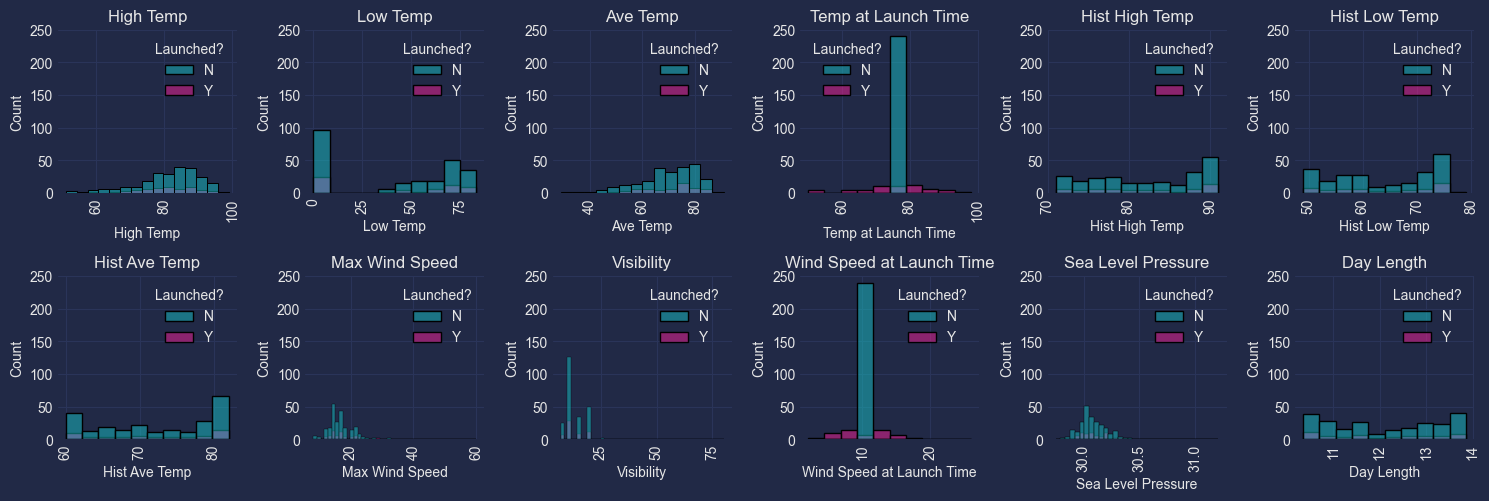

In [126]:
# 수치형 변수

plt.figure(figsize=(15, 5))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 6, i)
    sns.histplot(data=df, x=col, hue='Launched?')
    plt.xticks(rotation=90)
    plt.title(col)
    plt.ylim(0,250)
plt.tight_layout()

### 📍 변수 선택

In [127]:
X = df.drop(columns='Launched?')
y = df['Launched?']

X.shape, y.shape

((300, 16), (300,))

### 🔃 종속변수 인코딩
* Launched?
    * Y-->1
    * N-->0

* Launched?
    * Y-->1
    * N-->0

In [128]:
y = y.map({'Y': 1, 'N': 0})
y.value_counts()

Launched?
0    241
1     59
Name: count, dtype: int64

### 🔃 독립변수 레이블인코딩

In [129]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in X.select_dtypes(include=['object']):
    X[col] = encoder.fit_transform(df[col])
X.head(3)

,Location,Crewed or Uncrewed,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Sea Level Pressure,Day Length,Condition
0,0,1,75.0,68.0,71.00,75.101695,75.0,55.0,65.0,0,16.0,15.0,10.59322,30.22,10.433333,0
1,0,1,78.0,70.0,73.39,75.101695,75.0,55.0,65.0,0,14.0,10.0,10.59322,30.20,10.433333,0
2,0,1,73.0,0.0,60.21,62.000000,75.0,55.0,65.0,2,15.0,10.0,11.00000,30.25,10.416667,0


In [130]:
display(df['Crewed or Uncrewed'].value_counts())
display(X['Crewed or Uncrewed'].value_counts())

Crewed or Uncrewed
Uncrewed    284
Crewed       16
Name: count, dtype: int64

Crewed or Uncrewed
1    284
0     16
Name: count, dtype: int64

### ✂️ 훈련/테스트 데이터셋 분할


In [131]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((225, 16), (75, 16), (225,), (75,))

## ⚙️ 모델링

### 🧠 모델 생성 및 훈련

In [132]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### 📊 평가지표; Metrics

In [133]:
from sklearn.metrics import accuracy_score, classification_report

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

print('='*53)
print(f'훈련 데이터셋 정확도: {accuracy_score(y_train, pred_train)}')
print('-'*53)
print(classification_report(y_train, pred_train))
print('-'*53)
print(f'테스트 데이터셋 정확도: {accuracy_score(y_test, pred_test)}')
print('-'*53)
print(classification_report(y_test, pred_test))
print('='*53)

훈련 데이터셋 정확도: 1.0
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       181
           1       1.00      1.00      1.00        44

    accuracy                           1.00       225
   macro avg       1.00      1.00      1.00       225
weighted avg       1.00      1.00      1.00       225

-----------------------------------------------------
테스트 데이터셋 정확도: 0.9866666666666667
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.94      1.00      0.97        15

    accuracy                           0.99        75
   macro avg       0.97      0.99      0.98        75
weighted avg       0.99      0.99      0.99        75



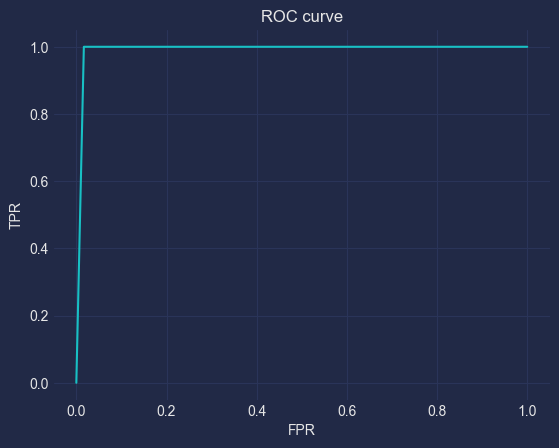

AUC: 0.9917


In [134]:
from sklearn.metrics import roc_auc_score, roc_curve

pred_proba = model.predict_proba(X_test)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

# AUC
auc = roc_auc_score(y_test, pred_proba[:, 1])
print(f'AUC: {auc:.4f}')

### 📑 모델의 학습 결과

트리 깊이: 5


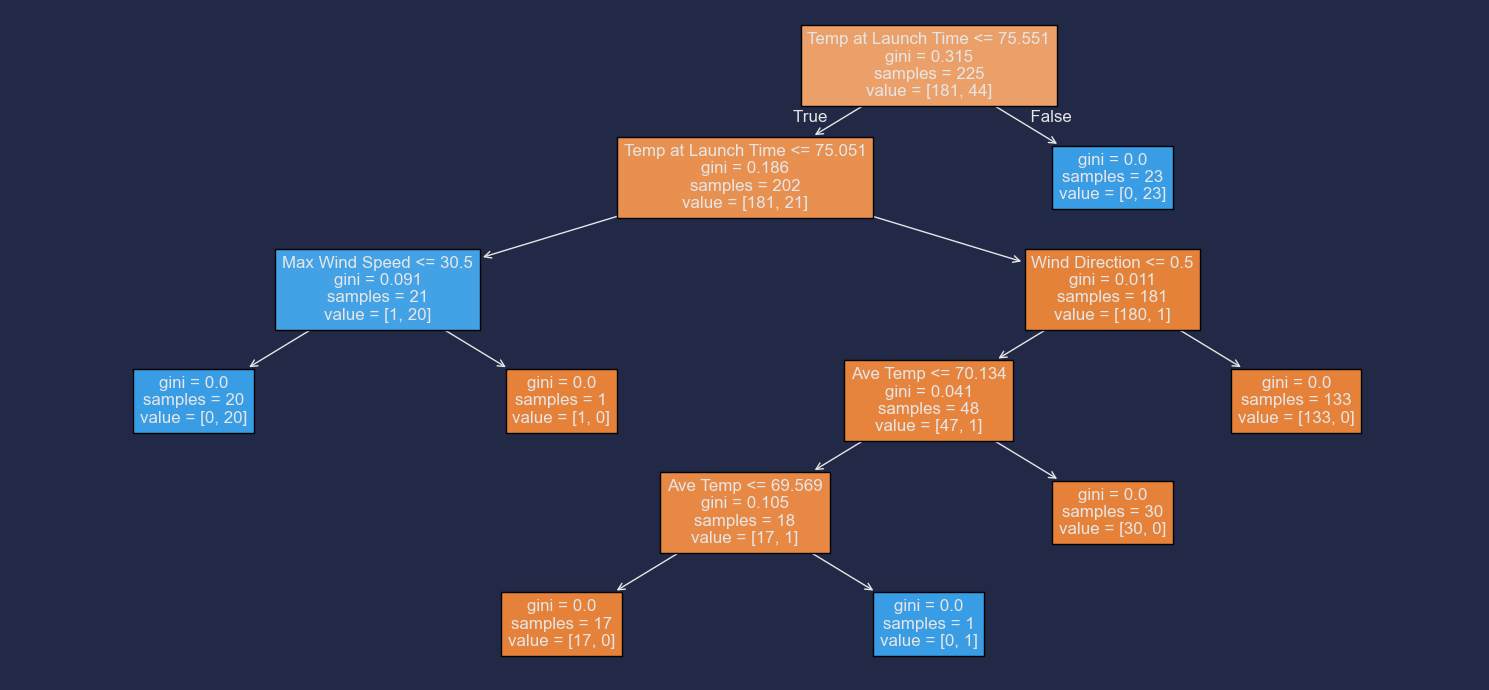

In [135]:
from sklearn.tree import plot_tree

print(f'트리 깊이: {model.tree_.max_depth}')

# 시각화
plt.figure(figsize=(15,7))
plot_tree(model, feature_names=X.columns, filled=True)
plt.tight_layout()
plt.show()

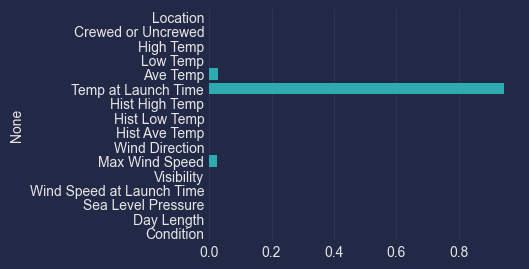

In [136]:
# 특성의 중요도

plt.figure(figsize=(4,3))
sns.barplot(y=X.columns, x=model.feature_importances_)
plt.show()

## 📍 독립 변수 재선택

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df.drop(columns='Launched?')
y = df['Launched?']

y = y.map({'Y': 1, 'N': 0})
y.value_counts()

encoder = LabelEncoder()
for col in X.select_dtypes(include=['object']):
    X[col] = encoder.fit_transform(df[col])

X2 = X.drop(['Wind Speed at Launch Time','Temp at Launch Time', 'Crewed or Uncrewed'], axis=1)
display(X2.head(3))

X_train, X_test, y_train, y_test = train_test_split(X2, y, shuffle=True, stratify=y, random_state=42)

,Location,High Temp,Low Temp,Ave Temp,Hist High Temp,Hist Low Temp,Hist Ave Temp,Wind Direction,Max Wind Speed,Visibility,Sea Level Pressure,Day Length,Condition
0,0,75.0,68.0,71.00,75.0,55.0,65.0,0,16.0,15.0,30.22,10.433333,0
1,0,78.0,70.0,73.39,75.0,55.0,65.0,0,14.0,10.0,30.20,10.433333,0
2,0,73.0,0.0,60.21,75.0,55.0,65.0,2,15.0,10.0,30.25,10.416667,0


In [176]:
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X2, y, random_state=42)
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

print('='*53)
print(f'훈련 데이터셋 정확도: {accuracy_score(y_train, pred_train)}')
print('혼동 행렬:')
print(confusion_matrix(y_train, pred_train))
print('-'*53)
print(f'테스트 데이터셋 정확도: {accuracy_score(y_test, pred_test)}')
print('혼동 행렬:')
print(confusion_matrix(y_test, pred_test))
print('-'*53)
print(classification_report(y_test, pred_test))
print('='*53)

훈련 데이터셋 정확도: 0.8133333333333334
혼동 행렬:
[[170  11]
 [ 31  13]]
-----------------------------------------------------
테스트 데이터셋 정확도: 0.7333333333333333
혼동 행렬:
[[53  7]
 [13  2]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        60
           1       0.22      0.13      0.17        15

    accuracy                           0.73        75
   macro avg       0.51      0.51      0.50        75
weighted avg       0.69      0.73      0.71        75



트리 깊이: 3


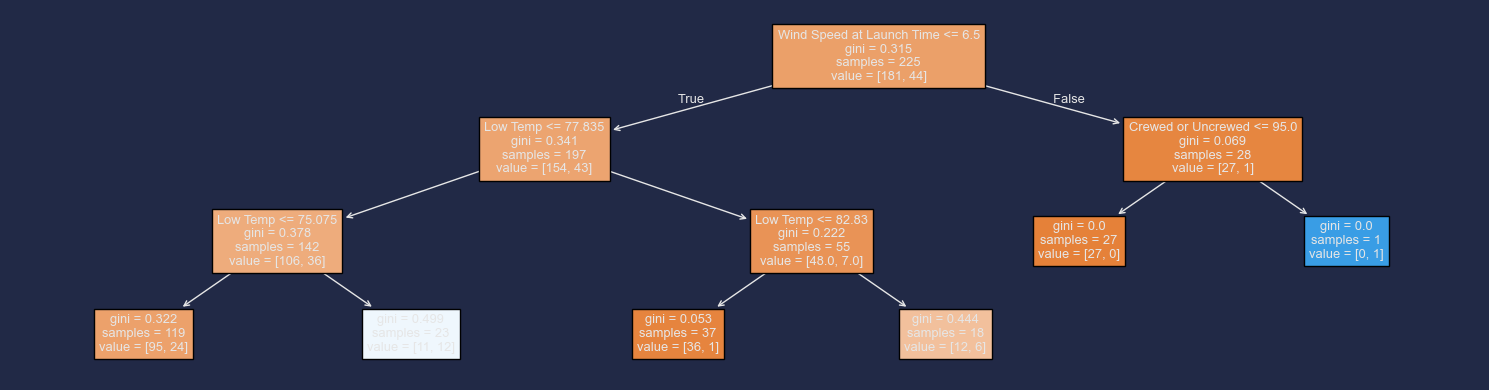

In [177]:
from sklearn.tree import plot_tree

print(f'트리 깊이: {model.tree_.max_depth}')
# 시각화
plt.figure(figsize=(15,4))
plot_tree(model, feature_names=X.columns, filled=True)
plt.tight_layout()
plt.show()

## 🔂 오버 샘플링에 의한 데이터 불균형 해소

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df.drop(columns='Launched?')
y = df['Launched?']

y = y.map({'Y': 1, 'N': 0})
y.value_counts()

encoder = LabelEncoder()
for col in X.select_dtypes(include=['object']):
    X[col] = encoder.fit_transform(df[col])
display(X.head(3))

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y, random_state=42)

,Location,Crewed or Uncrewed,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Sea Level Pressure,Day Length,Condition
0,0,1,75.0,68.0,71.00,75.101695,75.0,55.0,65.0,0,16.0,15.0,10.59322,30.22,10.433333,0
1,0,1,78.0,70.0,73.39,75.101695,75.0,55.0,65.0,0,14.0,10.0,10.59322,30.20,10.433333,0
2,0,1,73.0,0.0,60.21,62.000000,75.0,55.0,65.0,2,15.0,10.0,11.00000,30.25,10.416667,0


In [179]:
from imblearn.over_sampling import RandomOverSampler

# 오버샘플링 적용
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
print(X_train_resampled.shape, y_train_resampled.shape)
print(y_train_resampled.value_counts())

(362, 16) (362,)
Launched?
0    181
1    181
Name: count, dtype: int64


In [180]:
from sklearn.metrics import confusion_matrix

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)
pred_train = model.predict(X_train_resampled)
pred_test = model.predict(X_test)

print('='*53)
print(f'훈련 데이터셋 정확도: {accuracy_score(y_train_resampled, pred_train)}')
print('혼동 행렬:')
print(confusion_matrix(y_train_resampled, pred_train))
print('-'*53)
print(f'테스트 데이터셋 정확도: {accuracy_score(y_test, pred_test)}')
print('혼동 행렬:')
print(confusion_matrix(y_test, pred_test))
print('-'*53)
print(classification_report(y_test, pred_test))
print('='*53)

훈련 데이터셋 정확도: 1.0
혼동 행렬:
[[181   0]
 [  0 181]]
-----------------------------------------------------
테스트 데이터셋 정확도: 1.0
혼동 행렬:
[[60  0]
 [ 0 15]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        15

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



## 🚕 GridSearchCV

In [181]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df.drop(columns='Launched?')
y = df['Launched?']

y = y.map({'Y': 1, 'N': 0})
y.value_counts()

encoder = LabelEncoder()
for col in X.select_dtypes(include=['object']):
    X[col] = encoder.fit_transform(df[col])
display(X.head(3))

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y, random_state=42)

,Location,Crewed or Uncrewed,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Sea Level Pressure,Day Length,Condition
0,0,1,75.0,68.0,71.00,75.101695,75.0,55.0,65.0,0,16.0,15.0,10.59322,30.22,10.433333,0
1,0,1,78.0,70.0,73.39,75.101695,75.0,55.0,65.0,0,14.0,10.0,10.59322,30.20,10.433333,0
2,0,1,73.0,0.0,60.21,62.000000,75.0,55.0,65.0,2,15.0,10.0,11.00000,30.25,10.416667,0


In [182]:
from sklearn.model_selection import GridSearchCV, KFold

model = DecisionTreeClassifier()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 탐색할 하이퍼파라미터 범위
params = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 4, 6, 8]
}

gscv = GridSearchCV(model, param_grid=params, cv=kf, refit=True)
display(gscv.fit(X_train, y_train))
print(
    f'최적 파라미터\t\t: {gscv.best_params_}\n'
    f'훈련 데이터셋에 대한 정확도\t: {gscv.best_score_}'
)

best_model = gscv.best_estimator_ 
pred = best_model.predict(X_test)
print(f'테스트 데이터셋에 대한 정확도\t: {accuracy_score(y_test, pred)}')

# 자세한 결과
# result = pd.DataFrame(gscv.cv_results_)
# display(result)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 4, 6, 8]})

최적 파라미터		: {'max_depth': 2, 'min_samples_split': 2}
훈련 데이터셋에 대한 정확도	: 0.9866666666666667
테스트 데이터셋에 대한 정확도	: 1.0


In [183]:
from sklearn.metrics import confusion_matrix

pred_train = best_model.predict(X_train)
pred_test = best_model.predict(X_test)

print('='*53)
print(f'훈련 데이터셋 정확도: {accuracy_score(y_train, pred_train)}')
print('혼동 행렬:')
print(confusion_matrix(y_train, pred_train))
print('-'*53)
print(f'테스트 데이터셋 정확도: {accuracy_score(y_test, pred_test)}')
print('혼동 행렬:')
print(confusion_matrix(y_test, pred_test))
print('-'*53)
print(classification_report(y_test, pred_test))
print('='*53)

훈련 데이터셋 정확도: 0.9911111111111112
혼동 행렬:
[[180   1]
 [  1  43]]
-----------------------------------------------------
테스트 데이터셋 정확도: 1.0
혼동 행렬:
[[60  0]
 [ 0 15]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        15

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



# 다른 모델 적용